In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
import statsmodels.api as sm

%matplotlib inline
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [115]:
whoop=pd.read_csv('../Data/whoop_data.csv')

In [116]:
strava=pd.read_csv('../Data/my_actvities.csv')

In [117]:
strava.shape, whoop.shape

((200, 35), (260, 12))

In [118]:
mult_mile=0.000621371
strava['miles']=strava.distance*mult_mile

## Whoop data discovery

In [119]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score
0,17.4,95%,82%,7:16,8:53,"Today, Feb 11th",Running,16.2,NaN,NaN,NaN,NaN
1,13.2,50%,80%,7:49,9:48,"Sun, Feb 10th",Activity,9.9,NaN,NaN,NaN,NaN
2,19.5,27%,66%,6:18,9:33,"Sat, Feb 9th",Running,18.2,NaN,NaN,NaN,NaN
3,17.0,35%,75%,6:43,9:01,"Fri, Feb 8th",Running,14.9,NaN,NaN,NaN,NaN
4,15.6,93%,88%,8:21,9:31,"Thu, Feb 7th",Running,13.1,NaN,NaN,NaN,NaN


In [120]:
whoop.recovery.value_counts()

36%                 9
35%                 8
24%                 8
37%                 7
27%                 7
32%                 7
30%                 7
16%                 6
49%                 6
85%                 6
21%                 6
25%                 6
69%                 5
26%                 5
44%                 5
38%                 5
29%                 5
61%                 5
94%                 5
63%                 5
28%                 5
95%                 4
89%                 4
75%                 4
41%                 4
34%                 4
48%                 4
33%                 4
18%                 4
60%                 3
42%                 3
87%                 3
46%                 3
17%                 3
Incomplete\nData    3
93%                 3
54%                 3
20%                 3
19%                 3
59%                 3
13%                 3
86%                 2
40%                 2
78%                 2
31%                 2
47%       

In [121]:
print(whoop.activity_1.value_counts())
print(whoop.activity_2.value_counts())
print(whoop.activity_3.value_counts())

Running               92
Cycling               27
Swimming              15
Weightlifting          9
Activity               8
Hiking/Rucking         3
Triathlon              2
Other                  2
Soccer                 1
Functional Fitness     1
Golf                   1
Football               1
Name: activity_1, dtype: int64
Running     9
Activity    8
Cycling     4
Swimming    3
Other       2
Name: activity_2, dtype: int64
Cycling    4
Running    1
Other      1
Name: activity_3, dtype: int64


In [122]:
whoop['recovery']=whoop['recovery'].astype(str).apply(lambda x: np.nan if '%' not in x else float(x[:len(x)-1])/100)
whoop['sleep_perf']=whoop['sleep_perf'].astype(str).apply(lambda x: np.nan if '-' in x or "na" in x else float(x[:len(x)-1])/100)


In [123]:
whoop['rec_color']=whoop.recovery.apply(lambda x: 'red' if x<.34 else ('yellow' if x<.67 else ('none' if np.isnan(x) else 'green') ))
whoop.rec_color.value_counts()

yellow    101
red        92
green      61
none        6
Name: rec_color, dtype: int64

In [124]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color
0,17.4,0.95,0.82,7:16,8:53,"Today, Feb 11th",Running,16.2,NaN,NaN,NaN,NaN,green
1,13.2,0.50,0.80,7:49,9:48,"Sun, Feb 10th",Activity,9.9,NaN,NaN,NaN,NaN,yellow
2,19.5,0.27,0.66,6:18,9:33,"Sat, Feb 9th",Running,18.2,NaN,NaN,NaN,NaN,red
3,17.0,0.35,0.75,6:43,9:01,"Fri, Feb 8th",Running,14.9,NaN,NaN,NaN,NaN,yellow
4,15.6,0.93,0.88,8:21,9:31,"Thu, Feb 7th",Running,13.1,NaN,NaN,NaN,NaN,green


(array([ 1.,  0.,  1., 10., 29., 44., 54., 48., 46., 27.]),
 array([ 0.  ,  2.07,  4.14,  6.21,  8.28, 10.35, 12.42, 14.49, 16.56,
        18.63, 20.7 ]),
 <a list of 10 Patch objects>)

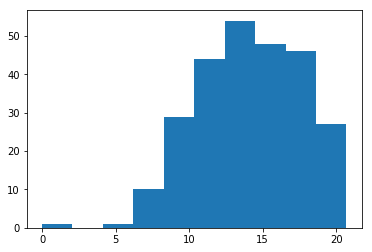

In [125]:
whoop.strain=whoop.strain.apply(lambda x: float(x) if x!="---" else 0)
plt.hist(whoop.strain)

In [126]:
for i in range(1,8):
    print(whoop.recovery.autocorr(lag=i))

0.0484017734074852
0.039956608567962244
0.09643946074562307
0.01722515006598723
-0.01628506949186611
-0.003991559330113072
0.10755788990894917


In [127]:
whoop.dtypes

strain              float64
recovery            float64
sleep_perf          float64
sleep                object
rec_sleep            object
date                 object
activity_1           object
activity_1_score    float64
activity_2           object
activity_2_score    float64
activity_3           object
activity_3_score    float64
rec_color            object
dtype: object

In [128]:
def time_to_dec(t):
    if ":" in t:
        hr=float(t[:t.find(':')])
        m=float(t[t.find(':')+1:])/60
        return hr+m
    else:
        return np.nan
whoop.sleep=whoop.sleep.astype(str).apply(time_to_dec)
whoop.rec_sleep=whoop.rec_sleep.astype(str).apply(time_to_dec)

In [129]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color
0,17.4,0.95,0.82,7.266667,8.883333,"Today, Feb 11th",Running,16.2,NaN,NaN,NaN,NaN,green
1,13.2,0.50,0.80,7.816667,9.800000,"Sun, Feb 10th",Activity,9.9,NaN,NaN,NaN,NaN,yellow
2,19.5,0.27,0.66,6.300000,9.550000,"Sat, Feb 9th",Running,18.2,NaN,NaN,NaN,NaN,red
3,17.0,0.35,0.75,6.716667,9.016667,"Fri, Feb 8th",Running,14.9,NaN,NaN,NaN,NaN,yellow
4,15.6,0.93,0.88,8.350000,9.516667,"Thu, Feb 7th",Running,13.1,NaN,NaN,NaN,NaN,green


### Making Variables

In [130]:
whoop['activity_total']=whoop[['activity_1_score','activity_2_score','activity_3_score']].apply(lambda x: sum([0 if np.isnan(y) else 1 for y in x ]),axis=1 )
whoop.activity_total.value_counts()

1    136
0     98
2     20
3      6
Name: activity_total, dtype: int64

In [131]:
whoop['sleep_addition']=whoop.rec_sleep-7.75

In [132]:
whoop['pday_rec']=whoop['recovery'].shift(-1)
whoop['pday_rec_col']=whoop['rec_color'].shift(-1)
whoop['pday_acts']=whoop['activity_total'].shift(-1)
whoop['pday_strain']=whoop['strain']
whoop['pday_sleep']=whoop.sleep.shift(-1)
whoop['pday_sleep_perf']=whoop.sleep_perf.shift(-1)

In [133]:
whoop['rolling_prev_2']=whoop.pday_sleep.rolling(2).mean()
whoop['prev_strain_rec_gap']=whoop.pday_strain/whoop.pday_strain.max()-whoop.pday_rec

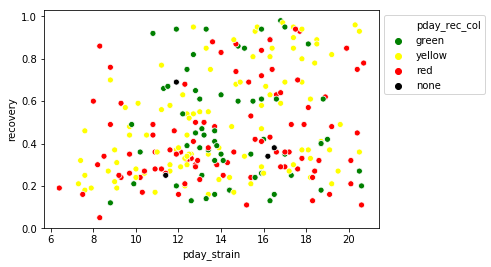

In [134]:
palet={'green':'green','yellow':'yellow','green':'green','none':'black','red':'red'}
sns.scatterplot('pday_strain','recovery',data=whoop, hue='pday_rec_col',
                hue_order=['green','yellow','red','none'],
               palette=palet)
plt.legend(bbox_to_anchor=(1,1))

In [135]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color,activity_total,sleep_addition,pday_rec,pday_rec_col,pday_acts,pday_strain,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap
0,17.4,0.95,0.82,7.266667,8.883333,"Today, Feb 11th",Running,16.2,NaN,NaN,NaN,NaN,green,1,1.133333,0.50,yellow,1.0,17.4,7.816667,0.80,NaN,0.340580
1,13.2,0.50,0.80,7.816667,9.800000,"Sun, Feb 10th",Activity,9.9,NaN,NaN,NaN,NaN,yellow,1,2.050000,0.27,red,1.0,13.2,6.300000,0.66,7.058333,0.367681
2,19.5,0.27,0.66,6.300000,9.550000,"Sat, Feb 9th",Running,18.2,NaN,NaN,NaN,NaN,red,1,1.800000,0.35,yellow,1.0,19.5,6.716667,0.75,6.508333,0.592029
3,17.0,0.35,0.75,6.716667,9.016667,"Fri, Feb 8th",Running,14.9,NaN,NaN,NaN,NaN,yellow,1,1.266667,0.93,green,1.0,17.0,8.350000,0.88,7.533333,-0.108744
4,15.6,0.93,0.88,8.350000,9.516667,"Thu, Feb 7th",Running,13.1,NaN,NaN,NaN,NaN,green,1,1.766667,0.65,yellow,1.0,15.6,6.166667,0.64,7.258333,0.103623


In [136]:
whoop.date.tail()

255     Fri, Jun 1st
256    Thu, May 31st
257    Wed, May 30th
258    Tue, May 29th
259    Mon, May 28th
Name: date, dtype: object

In [137]:
strava.head()

,achievement_count,athlete_count,average_speed,average_watts,comment_count,commute,device_watts,distance,elapsed_time,elev_high,elev_low,external_id,flagged,gear_id,has_kudoed,id,kilojoules,kudos_count,manual,max_speed,max_watts,moving_time,name,photo_count,private,start_date,start_date_local,timezone,total_elevation_gain,total_photo_count,trainer,type,upload_id,weighted_average_watts,workout_type,miles
0,3,1,3.324,NaN,0,False,NaN,9266.8,2810,118.6,57.2,garmin_push_2594081397,False,NaN,False,1483967793,NaN,5,False,4.5,NaN,2788,Morning Run,0,False,2018-04-01 15:54:18+00:00,2018-04-01 08:54:18+00:00,(GMT-08:00) America/Los_Angeles,91.0,0,False,Run,1598845934,NaN,NaN,5.758121
1,0,9,3.973,NaN,0,False,NaN,5530.9,2004,77.8,67.8,garmin_push_2597882997,False,NaN,False,1486944143,NaN,7,False,6.2,NaN,1392,Morning Run,0,False,2018-04-03 10:35:19+00:00,2018-04-03 06:35:19+00:00,(GMT-05:00) America/New_York,30.0,0,False,Run,1601956509,NaN,NaN,3.436741
2,0,1,2.963,NaN,0,False,NaN,4865.8,1736,73.6,54.8,garmin_push_2600153736,False,NaN,False,1488794733,NaN,2,False,13.4,NaN,1642,Morning Run,0,False,2018-04-04 10:58:33+00:00,2018-04-04 06:58:33+00:00,(GMT-05:00) America/New_York,27.0,0,False,Run,1603863011,NaN,NaN,3.023467
3,3,1,2.963,NaN,0,False,NaN,9666.4,4090,33.8,11.2,garmin_push_2602353832,False,NaN,False,1490564237,NaN,3,False,8.2,NaN,3262,Morning Run,0,False,2018-04-05 10:29:13+00:00,2018-04-05 06:29:13+00:00,(GMT-05:00) America/New_York,65.0,0,False,Run,1605677780,NaN,NaN,6.006421
4,0,1,0.753,NaN,2,False,NaN,868.7,3623,NaN,NaN,garmin_push_2605726138,False,NaN,False,1493353473,NaN,3,False,0.9,NaN,1153,Afternoon Swim,0,False,2018-04-06 21:56:04+00:00,2018-04-06 17:56:04+00:00,(GMT-05:00) America/New_York,0.0,0,True,Swim,1608556019,NaN,NaN,0.539785


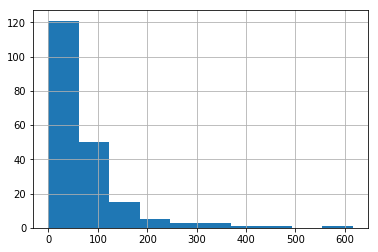

In [138]:
strava.total_elevation_gain.hist()

In [139]:
pd.crosstab(strava[strava.workout_type.notnull()].name,strava[strava.workout_type.notnull()].workout_type)
## I think 1 is run race, 11 is ride race, 0 is renamed run, 10 is renamed ride or photo or something
strava['race']=strava.workout_type.apply(lambda x: 1 if x in [1.0,11.0] else 0 )

In [140]:
strava.start_date.dtype,whoop.date.dtype

(dtype('O'), dtype('O'))

In [141]:
strava.start_date.head()

0    2018-04-01 15:54:18+00:00
1    2018-04-03 10:35:19+00:00
2    2018-04-04 10:58:33+00:00
3    2018-04-05 10:29:13+00:00
4    2018-04-06 21:56:04+00:00
Name: start_date, dtype: object

In [142]:
[x for x in whoop.date] ## for some reason december 4th is missing

['Today, Feb 11th',
 'Sun, Feb 10th',
 'Sat, Feb 9th',
 'Fri, Feb 8th',
 'Thu, Feb 7th',
 'Wed, Feb 6th',
 'Tue, Feb 5th',
 'Mon, Feb 4th',
 'Sun, Feb 3rd',
 'Sat, Feb 2nd',
 'Fri, Feb 1st',
 'Thu, Jan 31st',
 'Wed, Jan 30th',
 'Tue, Jan 29th',
 'Mon, Jan 28th',
 'Sun, Jan 27th',
 'Sat, Jan 26th',
 'Fri, Jan 25th',
 'Thu, Jan 24th',
 'Wed, Jan 23rd',
 'Tue, Jan 22nd',
 'Mon, Jan 21st',
 'Sun, Jan 20th',
 'Sat, Jan 19th',
 'Fri, Jan 18th',
 'Thu, Jan 17th',
 'Wed, Jan 16th',
 'Tue, Jan 15th',
 'Mon, Jan 14th',
 'Sun, Jan 13th',
 'Sat, Jan 12th',
 'Fri, Jan 11th',
 'Thu, Jan 10th',
 'Wed, Jan 9th',
 'Tue, Jan 8th',
 'Mon, Jan 7th',
 'Sun, Jan 6th',
 'Sat, Jan 5th',
 'Fri, Jan 4th',
 'Thu, Jan 3rd',
 'Wed, Jan 2nd',
 'Tue, Jan 1st',
 'Mon, Dec 31st',
 'Sun, Dec 30th',
 'Sat, Dec 29th',
 'Fri, Dec 28th',
 'Thu, Dec 27th',
 'Wed, Dec 26th',
 'Tue, Dec 25th',
 'Mon, Dec 24th',
 'Sun, Dec 23rd',
 'Sat, Dec 22nd',
 'Fri, Dec 21st',
 'Thu, Dec 20th',
 'Wed, Dec 19th',
 'Tue, Dec 18th',
 'Mon, D

In [143]:
month_dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4, 'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
whoop.date.fillna('tue, Dec 4th',inplace=True)
whoop['month']=whoop.date.apply(lambda x: month_dict[x[x.find(',')+1:x.find(',')+5].strip(" ")])
whoop['day']=whoop.date.apply(lambda x: x[-4:-2])
whoop['year']=whoop.month.apply(lambda x: 2018 if x not in [1,2] else 2019)
whoop['date_string']=whoop.year.astype(str) + "-" + whoop.month.astype(str).str.strip(' ').str.zfill(2) + "-" + whoop.day.astype(str).str.strip(' ').str.zfill(2)

In [144]:
strava['day']=strava.start_date.apply(lambda x: x[8:10])
strava['month']=strava.start_date.apply(lambda x: x[5:7])
strava['year']=strava.start_date.apply(lambda x: x[:4])
strava['date_string']=strava.start_date.apply(lambda x: x[:10])
strava['moving_minutes']=strava.moving_time/60
strava['elapsed_minutes']=strava.elapsed_time/60
strava['rest']=strava.elapsed_minutes-strava.moving_minutes
## average speed is in meters/second - 2.237 to multiply to mph
strava['avg_mph']=strava.average_speed*2.237
strava['time_since_last_act']=(pd.to_datetime(strava.start_date)-pd.to_datetime(strava.start_date.shift(-1))).astype('timedelta64[h]')

In [145]:
## Checking to see if there are more than one run on each day (since that will complicate things)
multi_act=strava.groupby(['date_string','type']).type.count().sort_values(ascending=False).unstack()
multi_dates=multi_act[multi_act.Run>1].index.values
mult_df=strava[strava.date_string.isin(multi_dates)]
mult_df.start_date_local 
## way to do it is to sort on date and assign an activity number in strava, 
## reshape activities in whoop so it's activity unique rows, then merge on activity number and activity type and date

73     2018-07-15 06:50:01+00:00
74     2018-07-15 07:39:48+00:00
75     2018-07-15 08:57:52+00:00
132    2018-10-03 06:27:25+00:00
133    2018-10-03 07:20:42+00:00
169    2018-12-25 16:51:37+00:00
170    2018-12-26 06:40:44+00:00
176    2019-01-05 12:38:09+00:00
177    2019-01-05 13:40:22+00:00
185    2019-01-17 19:33:44+00:00
186    2019-01-18 07:59:21+00:00
191    2019-01-28 19:04:23+00:00
192    2019-01-29 06:50:47+00:00
Name: start_date_local, dtype: object

In [146]:
## Splitting into subsets by activity, then appending. Keeping the nulls for the first activity, but not the rest
act_1=whoop[['date','activity_1','activity_1_score']]
act_1.columns=['date','activity','score']
act_1['order']=1

act_2=whoop[['date','activity_2','activity_2_score']]
act_2.columns=['date','activity','score']
act_2['order']=2
act_2.dropna(inplace=True)

act_3=whoop[['date','activity_3','activity_3_score']]
act_3.columns=['date','activity','score']
act_3['order']=3
act_3.dropna(inplace=True)

all_acts=pd.concat([act_1,act_2,act_3])
all_desc=whoop.drop(['activity_1','activity_2','activity_3','activity_1_score','activity_2_score','activity_3_score'],
                   axis=1)
whoop_df=all_desc.merge(all_acts, how ='left',left_on='date',right_on='date')
whoop_df.head()

/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://panda

,strain,recovery,sleep_perf,sleep,rec_sleep,date,rec_color,activity_total,sleep_addition,pday_rec,pday_rec_col,pday_acts,pday_strain,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap,month,day,year,date_string,activity,score,order
0,17.4,0.95,0.82,7.266667,8.883333,"Today, Feb 11th",green,1,1.133333,0.50,yellow,1.0,17.4,7.816667,0.80,NaN,0.340580,2,11,2019,2019-02-11,Running,16.2,1
1,13.2,0.50,0.80,7.816667,9.800000,"Sun, Feb 10th",yellow,1,2.050000,0.27,red,1.0,13.2,6.300000,0.66,7.058333,0.367681,2,10,2019,2019-02-10,Activity,9.9,1
2,19.5,0.27,0.66,6.300000,9.550000,"Sat, Feb 9th",red,1,1.800000,0.35,yellow,1.0,19.5,6.716667,0.75,6.508333,0.592029,2,9,2019,2019-02-09,Running,18.2,1
3,17.0,0.35,0.75,6.716667,9.016667,"Fri, Feb 8th",yellow,1,1.266667,0.93,green,1.0,17.0,8.350000,0.88,7.533333,-0.108744,2,8,2019,2019-02-08,Running,14.9,1
4,15.6,0.93,0.88,8.350000,9.516667,"Thu, Feb 7th",green,1,1.766667,0.65,yellow,1.0,15.6,6.166667,0.64,7.258333,0.103623,2,7,2019,2019-02-07,Running,13.1,1


In [147]:
strava_keep=['miles','date_string','moving_minutes','elapsed_minutes','rest','avg_mph','time_since_last_act','start_date','day','total_elevation_gain','race']
strava_df=strava[strava.type=='Run'][strava_keep]
strava_df.start_date=pd.to_datetime(strava_df.start_date)
strava_df.sort_values('start_date',inplace=True)
strava_df['order']=strava_df.groupby('date_string').start_date.rank()
strava_df

,miles,date_string,moving_minutes,elapsed_minutes,rest,avg_mph,time_since_last_act,start_date,day,total_elevation_gain,race,order
0,5.758121,2018-04-01,46.466667,46.833333,0.366667,7.435788,-43.0,2018-04-01 15:54:18,01,91.0,0,1.0
1,3.436741,2018-04-03,23.200000,33.400000,10.200000,8.887601,-25.0,2018-04-03 10:35:19,03,30.0,0,1.0
2,3.023467,2018-04-04,27.366667,28.933333,1.566667,6.628231,-24.0,2018-04-04 10:58:33,04,27.0,0,1.0
3,6.006421,2018-04-05,54.366667,68.166667,13.800000,6.628231,-36.0,2018-04-05 10:29:13,05,65.0,0,1.0
5,10.203285,2018-04-08,74.450000,74.566667,0.116667,8.209790,-48.0,2018-04-08 11:30:34,08,50.0,1,1.0
6,2.891053,2018-04-10,30.983333,31.050000,0.066667,5.599211,-24.0,2018-04-10 11:06:30,10,46.0,0,1.0
7,5.017012,2018-04-11,39.100000,41.183333,2.083333,7.699754,-52.0,2018-04-11 10:33:48,11,30.0,0,1.0
8,5.470923,2018-04-13,46.616667,50.016667,3.400000,7.042076,-25.0,2018-04-13 13:54:12,13,44.0,0,1.0
9,3.514412,2018-04-14,30.933333,34.383333,3.450000,6.816139,-45.0,2018-04-14 14:08:56,14,64.0,0,1.0
10,7.528593,2018-04-16,64.833333,68.816667,3.983333,6.968255,-61.0,2018-04-16 10:32:24,16,70.0,0,1.0


In [151]:
all_acts=whoop_df.merge(strava_df, left_on=['date_string','order'],right_on=['date_string','order'])
len(strava_df),whoop.date_string.nunique(),len(all_acts)

(133, 260, 104)

In [152]:
strava_df[strava_df.date_string<whoop.date_string.min()].shape[0]
dates=strava_df[strava_df.date_string>whoop.date_string.min()].date_string.values
[x for x in dates if x not in all_acts.date_string.values]
len(set(dates)),len(set(all_acts.date_string.values)) ## all the dates are in here!
all_acts.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,rec_color,activity_total,sleep_addition,pday_rec,pday_rec_col,pday_acts,pday_strain,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap,month,day_x,year,date_string,activity,score,order,miles,moving_minutes,elapsed_minutes,rest,avg_mph,time_since_last_act,start_date,day_y,total_elevation_gain,race
0,15.6,0.93,0.88,8.350000,9.516667,"Thu, Feb 7th",green,1,1.766667,0.65,yellow,1.0,15.6,6.166667,0.64,7.258333,0.103623,2,7,2019,2019-02-07,Running,13.1,1,4.144855,35.100000,39.666667,4.566667,7.084579,NaN,2019-02-07 12:32:01,07,39.0,0
1,16.3,0.81,0.72,6.683333,9.350000,"Tue, Feb 5th",green,1,1.600000,0.57,yellow,1.0,16.3,7.983333,0.87,7.333333,0.217440,2,5,2019,2019-02-05,Running,14.6,1,6.658425,58.466667,62.150000,3.683333,6.834035,-49.0,2019-02-05 12:13:05,05,61.0,0
2,18.1,0.57,0.87,7.983333,9.183333,"Mon, Feb 4th",yellow,1,1.433333,0.29,red,1.0,18.1,7.150000,0.81,7.566667,0.584396,2,4,2019,2019-02-04,Running,17.1,1,6.005924,52.250000,56.766667,4.516667,6.896671,-13.0,2019-02-04 23:39:20,04,59.0,0
3,15.9,0.29,0.81,7.150000,8.783333,"Sun, Feb 3rd",red,1,1.033333,0.41,yellow,1.0,15.9,9.116667,1.00,8.133333,0.358116,2,3,2019,2019-02-03,Running,12.9,1,3.268846,28.250000,33.483333,5.233333,6.943648,-26.0,2019-02-03 22:22:12,03,33.0,0
4,18.7,0.41,1.00,9.116667,7.850000,"Sat, Feb 2nd",yellow,1,0.100000,0.42,yellow,1.0,18.7,5.833333,0.66,7.475000,0.483382,2,2,2019,2019-02-02,Running,17.9,1,9.773731,77.816667,82.150000,4.333333,7.536453,-30.0,2019-02-02 17:04:43,02,96.0,0


In [153]:
X_train.isnull().sum()

const          0
pday_strain    0
dtype: int64

In [154]:
## can dummy the type later - impute missing as average later, limit to runs, clean up collinearity
all_acts.dropna(inplace=True)
X=all_acts.drop(['strain','date','rec_color','pday_rec_col','activity_total','month','day_x','year','date_string','activity','score',
                 'order','start_date','day_y'],axis=1)
y=all_acts.score
X_train,X_test,y_train,y_test=tts(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train)
res=lr.fit()
res.summary()

(72, 20) (72,)
(25, 20) (25,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     7.970
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           2.58e-09
Time:                        22:44:52   Log-Likelihood:                -131.90
No. Observations:                  72   AIC:                             297.8
Df Residuals:                      55   BIC:                             336.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0109      0.204     -0.054      0.957      -0.419       0.397
recovery                 0.0948      0.795      0.119      0.905      -1.498       1.688
sleep_perf               2.6015     11.597      0.224      0.823     -20.640      25.843
sleep                   -0.3469      1.012     -0.343      0.733      -2.375       1.681
rec_sleep               -0.3927      0.586     -0.671      0.505      -1.566       0.781
sleep_addition          -0.3079      1.124     -0.274      0.785      -2.561       1.945
pday_rec                 0.2718      0.574      0.473      0.638      -0.879       1.422
pday_acts                0.5967      0.421      1.416      0.162      -0.248       1.441
pday_strain              0.8133      0.131      6.229      0.000       0.552       1.075
pday_sleep               0.3796      0.459      0.827      0.412      -0.541       1.300
pday_sleep_perf         -5.1888      4.965     -1.045      0.301     -15.138       4.761
rolling_prev_2           0.0163      0.406      0.040      0.968      -0.798       0.831
prev_strain_rec_gap     -0.2325      0.573     -0.406      0.686      -1.381       0.915
miles                   -0.2100      1.078     -0.195      0.846      -2.370       1.950
moving_minutes           0.0474      0.089      0.531      0.597      -0.131       0.226
elapsed_minutes          0.0107      0.044      0.245      0.807      -0.077       0.098
rest                    -0.0367      0.050     -0.733      0.467      -0.137       0.064
avg_mph                  0.5424      0.538      1.008      0.318      -0.536       1.621
time_since_last_act     -0.0065      0.008     -0.803      0.426      -0.023       0.010
total_elevation_gain     0.0059      0.006      0.921      0.361      -0.007       0.019
race                     0.9128      1.066      0.856      0.396      -1.224       3.050
==============================================================================
Omnibus:                       55.116   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.778
Skew:                          -2.219   Prob(JB):                     2.65e-64
Kurtosis:                      11.825   Cond. No.                     2.65e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
## trying just pday strain and recovery and sleep
X=all_acts[['pday_strain','recovery','sleep_perf','sleep_addition']]
y=all_acts.score
X_train,X_test,y_train,y_test=tts(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train)
res=lr.fit()
res.summary()

(72, 4) (72,)
(25, 4) (25,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     40.16
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           3.95e-17
Time:                        22:45:13   Log-Likelihood:                -128.08
No. Observations:                  72   AIC:                             266.2
Df Residuals:                      67   BIC:                             277.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4351      1.740     -0.825      0.412      -4.908       2.038
pday_strain        1.0722      0.085     12.625      0.000       0.903       1.242
recovery           0.0526      0.672      0.078      0.938      -1.288       1.393
sleep_perf        -2.2133      1.273     -1.738      0.087      -4.755       0.328
sleep_addition    -0.2620      0.269     -0.973      0.334      -0.799       0.275
==============================================================================
Omnibus:                       82.890   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1033.536
Skew:                          -3.366   Prob(JB):                    3.72e-225
Kurtosis:                      20.297   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
## just previous day strain
X=all_acts['pday_strain']
y=all_acts.score
X_train,X_test,y_train,y_test=tts(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train)
res=lr.fit()
res.summary()

(72,) (72,)
(25,) (25,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     83.77
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           1.39e-13
Time:                        22:45:31   Log-Likelihood:                -143.44
No. Observations:                  72   AIC:                             290.9
Df Residuals:                      70   BIC:                             295.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5898      1.824     -0.872      0.386      -5.227       2.048
pday_strain     0.9539      0.104      9.153      0.000       0.746       1.162
==============================================================================
Omnibus:                       52.932   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.549
Skew:                          -2.279   Prob(JB):                     1.16e-46
Kurtosis:                      10.053   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
## Trying with some interactions
X_int=all_acts.drop(['strain','date','rec_color','pday_rec_col','activity_total','month','day_x','year','date_string','activity','score',
                 'order','start_date','day_y','elapsed_minutes'],axis=1)
X_int['miles_mint']=X_int.miles*X_int.moving_minutes
X_int['mph_over_avg']=X_int.avg_mph-X_int.avg_mph.mean()
X_int['log_pday_strain']=np.log(X_int.pday_strain)
X_int.drop(['pday_strain','avg_mph','rec_sleep'],axis=1,inplace=True)
X_int.head()

,recovery,sleep_perf,sleep,sleep_addition,pday_rec,pday_acts,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap,miles,moving_minutes,rest,time_since_last_act,total_elevation_gain,race,miles_mint,mph_over_avg,log_pday_strain
1,0.81,0.72,6.683333,1.600000,0.57,1.0,7.983333,0.87,7.333333,0.217440,6.658425,58.466667,3.683333,-49.0,61.0,0,389.295928,-0.285806,2.791165
2,0.57,0.87,7.983333,1.433333,0.29,1.0,7.150000,0.81,7.566667,0.584396,6.005924,52.250000,4.516667,-13.0,59.0,0,313.809505,-0.223170,2.895912
3,0.29,0.81,7.150000,1.033333,0.41,1.0,9.116667,1.00,8.133333,0.358116,3.268846,28.250000,5.233333,-26.0,33.0,0,92.344911,-0.176193,2.766319
4,0.41,1.00,9.116667,0.100000,0.42,1.0,5.833333,0.66,7.475000,0.483382,9.773731,77.816667,4.333333,-30.0,96.0,0,760.559157,0.416612,2.928524
5,0.42,0.66,5.833333,1.050000,0.98,1.0,8.700000,0.95,7.266667,-0.207053,3.777998,31.283333,43.100000,-30.0,42.0,0,118.188365,0.125802,2.772589


In [187]:
X_train,X_test,y_train,y_test=tts(X_int,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train)
res=lr.fit()
res.summary()

(72, 19) (72,)
(25, 19) (25,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     12.27
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           4.96e-13
Time:                        23:17:40   Log-Likelihood:                -112.19
No. Observations:                  72   AIC:                             262.4
Df Residuals:                      53   BIC:                             305.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   58.7067     40.481      1.450      0.153     -22.487     139.901
recovery                -0.4147      0.648     -0.640      0.525      -1.715       0.886
sleep_perf              -1.6685     12.085     -0.138      0.891     -25.908      22.571
sleep                    0.1143      1.079      0.106      0.916      -2.050       2.278
sleep_addition          -0.6231      0.840     -0.741      0.462      -2.309       1.063
pday_rec                58.5058     28.267      2.070      0.043       1.810     115.202
pday_acts                0.3538      0.327      1.083      0.284      -0.301       1.009
pday_sleep               0.4393      0.395      1.113      0.271      -0.352       1.231
pday_sleep_perf         -5.7126      3.933     -1.452      0.152     -13.602       2.176
rolling_prev_2           0.2768      0.431      0.642      0.523      -0.588       1.141
prev_strain_rec_gap     58.5421     28.367      2.064      0.044       1.645     115.440
miles                    0.0911      0.811      0.112      0.911      -1.535       1.718
moving_minutes           0.0720      0.105      0.684      0.497      -0.139       0.283
rest                    -0.0136      0.022     -0.607      0.546      -0.058       0.031
time_since_last_act      0.0013      0.006      0.210      0.835      -0.011       0.013
total_elevation_gain     0.0086      0.006      1.515      0.136      -0.003       0.020
race                     0.8315      0.920      0.904      0.370      -1.014       2.677
miles_mint              -0.0046      0.003     -1.371      0.176      -0.011       0.002
mph_over_avg             0.7300      0.446      1.637      0.108      -0.164       1.624
log_pday_strain        -33.3329     22.607     -1.474      0.146     -78.677      12.011
==============================================================================
Omnibus:                       23.198   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.837
Skew:                          -1.134   Prob(JB):                     4.99e-10
Kurtosis:                       6.022   Cond. No.                     1.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.58e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

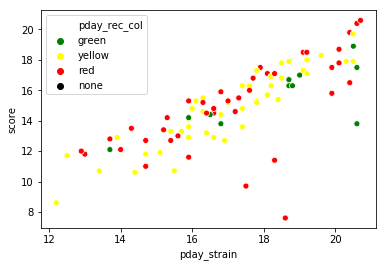

In [157]:
sns.scatterplot('pday_strain','score',hue='pday_rec_col',data=all_acts,hue_order=['green','yellow','red','none'],
               palette=palet)

#### Feature ideas
* Miles above average for last two weeks
* Elevation gain/mile
* rest as % of total time
* speed above average for last two weeks
* 

## Next steps

1. Interact features
1. Make a few more features
2. Attach whoop to strava
3. Run linear reg - see how it does

In [165]:
X_int.corr()

,recovery,sleep_perf,sleep,rec_sleep,sleep_addition,pday_rec,pday_acts,pday_strain,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap,miles,moving_minutes,elapsed_minutes,rest,avg_mph,time_since_last_act,total_elevation_gain,race
recovery,1.000000,0.186307,0.222298,0.055053,0.055053,-0.157539,-0.090803,0.005632,-0.060453,-0.102795,0.110420,0.147935,0.000129,-0.019790,-0.007130,0.029352,0.150031,0.066868,-0.114746,-0.085167
sleep_perf,0.186307,1.000000,0.934253,-0.296058,-0.296058,-0.076151,0.044596,0.069450,0.183892,0.179146,0.773785,0.100316,0.014199,-0.014353,-0.078391,-0.177660,0.176760,0.195569,-0.106833,-0.376235
sleep,0.222298,0.934253,1.000000,0.039711,0.039711,-0.081311,0.146090,0.107073,0.025759,-0.001556,0.707256,0.121325,-0.026887,-0.060058,-0.111820,-0.155958,0.209245,0.168157,-0.160635,-0.387043
rec_sleep,0.055053,-0.296058,0.039711,1.000000,1.000000,-0.039939,0.262929,0.032692,-0.443102,-0.499666,-0.285996,0.051002,-0.150233,-0.154856,-0.132098,0.022347,0.087080,-0.096115,-0.178095,-0.047361
sleep_addition,0.055053,-0.296058,0.039711,1.000000,1.000000,-0.039939,0.262929,0.032692,-0.443102,-0.499666,-0.285996,0.051002,-0.150233,-0.154856,-0.132098,0.022347,0.087080,-0.096115,-0.178095,-0.047361
pday_rec,-0.157539,-0.076151,-0.081311,-0.039939,-0.039939,1.000000,0.086455,0.049443,0.229771,0.295680,0.106465,-0.902263,-0.225152,-0.209590,-0.162654,0.074085,-0.139672,0.082790,0.049734,0.106868
pday_acts,-0.090803,0.044596,0.146090,0.262929,0.262929,0.086455,1.000000,0.074869,0.071229,0.095812,0.151035,-0.047529,0.061973,0.063599,0.078845,0.057642,0.054290,-0.001732,-0.015432,-0.210841
pday_strain,0.005632,0.069450,0.107073,0.032692,0.032692,0.049443,0.074869,1.000000,-0.003074,0.011986,0.071603,0.386048,0.353107,0.359980,0.340927,0.040028,-0.103065,0.019279,0.305748,0.390469
pday_sleep,-0.060453,0.183892,0.025759,-0.443102,-0.443102,0.229771,0.071229,-0.003074,1.000000,0.937646,0.724941,-0.213545,-0.008295,-0.007225,0.027971,0.093790,-0.004706,0.014386,0.183253,-0.040288
pday_sleep_perf,-0.102795,0.179146,-0.001556,-0.499666,-0.499666,0.295680,0.095812,0.011986,0.937646,1.000000,0.662024,-0.267918,0.015502,0.028392,0.054123,0.077153,-0.079431,0.029943,0.252041,0.031574


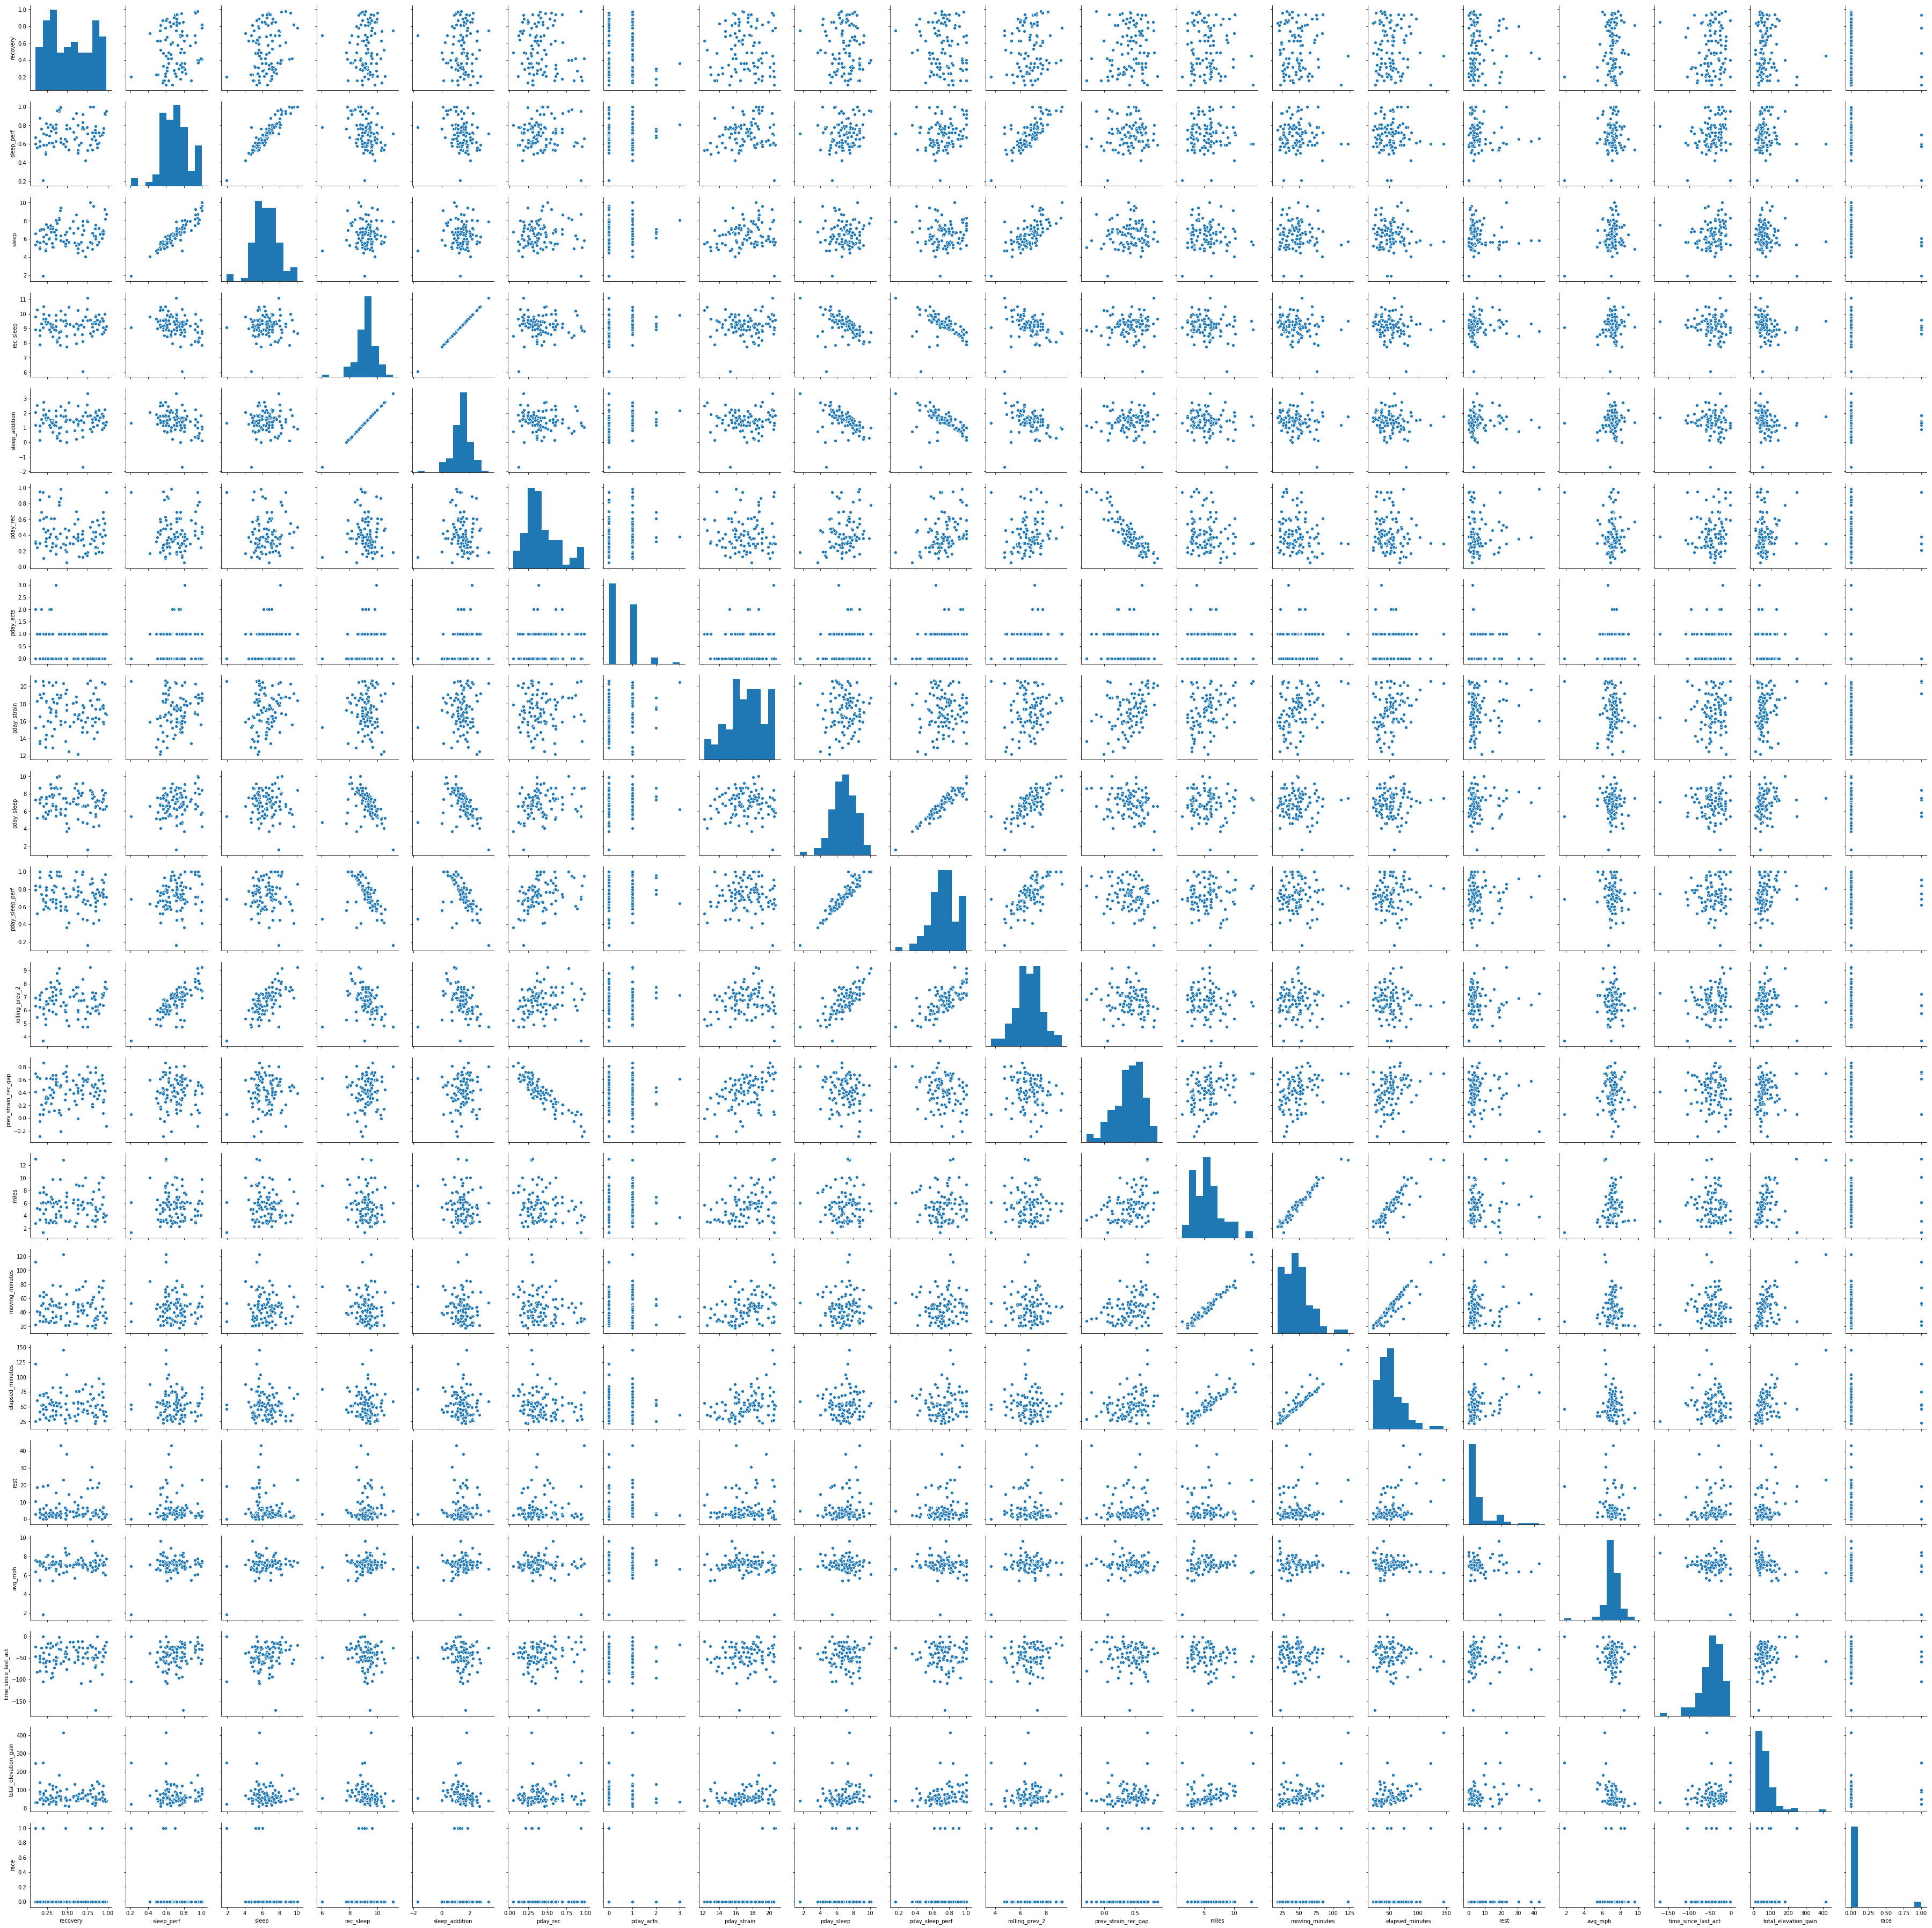

In [164]:
sns.pairplot(X_int)

/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


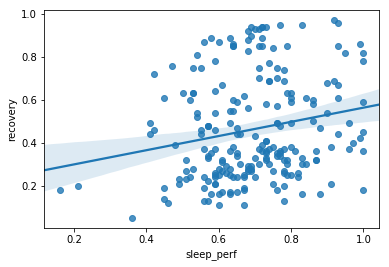

In [171]:
## maybe logarithimc?
sns.regplot(whoop.sleep_perf, whoop.recovery)

/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


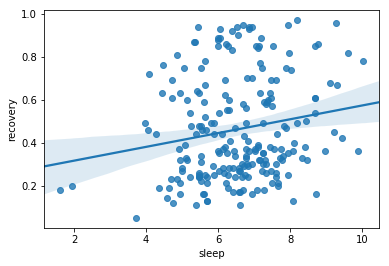

In [172]:
sns.regplot(whoop.sleep, whoop.recovery)